**Implementação de análise de componentes principais.**

In [ ]:
import matplotlib.pyplot as plt
import sympy as s
import copy as copy
import numpy as np
import cv2 as cv
import math

def determinantePorTriangulacao(matriz):
    n = int(pow(np.array(matriz).size, 0.5)) #sympy retorna a quantidade de elementos, não a dimensão da matriz
    m = copy.deepcopy(matriz)
    for i in range(n):
        for j in range(i + 1, n):
            if m[i, i] == 0:
                m[i, i] = 1.0e-18
            mult = m[j, i] / m[i, i]
            for k in range(n):
                m[j, k] = m[j, k] - mult * m[i, k]
    determinante = 1
    for i in range(n):
        determinante = determinante * m[i, i]
    return determinante

def autoValor(matriz):
    n = np.array(matriz).size
    m = s.Matrix(matriz)
    x = s.symbols('x')
    for i in range(n):
       m[i, i] = m[i, i] - x
    det = determinantePorTriangulacao(m)
    y = s.solve(det, x)
    return y

def positivo(num):
    if num < 0:
        num = -num
    return num

def matrizTransposta(matriz):
    n = np.array(matriz).size
    c = np.array(matriz[0]).size
    n = int(n / c)
    m = np.zeros((c, n))
    for i in range(c):
        for j in range(n):
            m[i, j] = matriz[j, i]
    return m

def mediasColunas(matriz):
    n = np.array(matriz).size
    c = np.array(matriz[0]).size
    n = int(n / c)
    medias = np.zeros((c))
    for i in range(n):
        for j in range(c):
            medias[j] = medias[j] + matriz[i, j]
    return medias / c

def subtrairMatrizes(matriz, medias):
    m = somarMatrizes(matriz, -1 * medias)
    return m

def somarMatrizes(matriz, medias):
    n = np.array(matriz).size
    c = np.array(matriz[0]).size
    n = int(n / c)
    m = np.zeros((n, c))
    for i in range(n):
        for j in range(c):
            m[i, j] = matriz[i, j] + medias[j]
    return m

def multiplicaMatrizes(matriz1, matriz2):
    n2 = np.array(matriz2).size
    c = np.array(matriz1[0]).size
    n2 = int(n2 / np.array(matriz2[0]).size)
    if c != n2:
        print("Matrizes não podem ser multiplicadas")
        return
    resultante = np.dot(matriz1, matriz2)
    return resultante

def matrizCovariancia(matriz):
    m = matrizTransposta(matriz)
    resultante = multiplicaMatrizes(matriz, m)
    c = np.array(matriz[0]).size
    return resultante / (c - 1)

def RetornaVetorEValor(matriz):
    autovalor, autovetor = np.linalg.eig(matriz)
    return autovalor, autovetor

def varianciaExplicada(autovalores):
    n = np.array(autovalores).size
    c = np.array(autovalores[0]).size
    n = int(n / c)
    soma = 0
    for i in range(n):
        soma = soma + autovalores[i]
    return autovalores / soma

**Exemplo 1, matriz simples.**

In [ ]:
valores = np.array(([2.8811, 3.8030, 3.6851, -0.6650, -0.7844, 5.5984, 4.0082, 11.3941, 
                    12.8090, 6.8662, 13.0082, 14.9611, 12.9753, 16.8402, 18.4373, 15.4916, 
                    18.2839, 17.7676, 13.2586, 18.4653, 21.4630, 21.2120, 20.7231, 27.3713, 
                    27.2953, 28.4909, 24.7253, 27.9318, 31.7255, 33.3350, 31.6846, 28.0678, 
                    33.5385, 28.7205, 33.0673, 36.6693, 40.3373, 40.1095, 37.8455, 41.5675],
                    [-0.8295, 5.7179, 6.8797, 6.6415, 2.8888, 4.5474, 3.4669, 9.8442, 11.8284,
                    13.1371, 10.5828, 11.9887, 8.4888, 16.9971, 13.5039, 12.0567, 19.9965, 
                    19.6259, 21.8249, 16.8495, 21.7323, 22.6428, 18.2281, 22.0732, 21.7529, 
                    27.1667, 23.8338, 30.9620, 31.2658, 27.9003, 29.9790, 32.9481, 35.3437, 
                    34.0963, 34.7474, 33.2604, 35.5642, 39.1380, 41.8441, 41.2086])) 
medias = mediasColunas(valores)
matrizAux = subtrairMatrizes(valores, medias)
MC = matrizCovariancia(matrizAux)

**Digite o número de amostras e será gerado uma compressão e logo após será montado a matriz valores aproximada**

In [ ]:
numeroAmostras = 2

if numeroAmostras >= len(valores):
    numeroAmostras = len(valores)
    print("Número de amostras inválido, valor setado para ", numeroAmostras)

autovalor, autovetor = RetornaVetorEValor(MC)
autovalor = autovalor[0:numeroAmostras]
autovetor = autovetor[:, 0:numeroAmostras]
autovetorT = matrizTransposta(autovetor)
matrizComprimida = multiplicaMatrizes(autovetorT, matrizAux)

Final = multiplicaMatrizes(autovetor, matrizComprimida)
Final = somarMatrizes(Final, medias)
print(Final)

Número de amostras inválido, valor setado para  2
[[ 2.8811  3.803   3.6851 -0.665  -0.7844  5.5984  4.0082 11.3941 12.809
   6.8662 13.0082 14.9611 12.9753 16.8402 18.4373 15.4916 18.2839 17.7676
  13.2586 18.4653 21.463  21.212  20.7231 27.3713 27.2953 28.4909 24.7253
  27.9318 31.7255 33.335  31.6846 28.0678 33.5385 28.7205 33.0673 36.6693
  40.3373 40.1095 37.8455 41.5675]
 [-0.8295  5.7179  6.8797  6.6415  2.8888  4.5474  3.4669  9.8442 11.8284
  13.1371 10.5828 11.9887  8.4888 16.9971 13.5039 12.0567 19.9965 19.6259
  21.8249 16.8495 21.7323 22.6428 18.2281 22.0732 21.7529 27.1667 23.8338
  30.962  31.2658 27.9003 29.979  32.9481 35.3437 34.0963 34.7474 33.2604
  35.5642 39.138  41.8441 41.2086]]


**Exemplo 2, com uma imagem**

**IMPORTANTE COLOCAR UMA IMAGEM EM ARQUIVOS E COLOCAR ABAIXO SEU NOME E EXTENSÃO**

In [ ]:
imagem = 'gato.jpg'

imagem = cv.imread(imagem)
azul, verde, vermelho = cv.split(imagem)
print("Número máximo de componentes: ", len(azul))

Número máximo de componentes:  450


**Número de amostras que desejamos:**

In [ ]:
numeroAmostras = 420


**Exemplo 2, com funções implementadas**

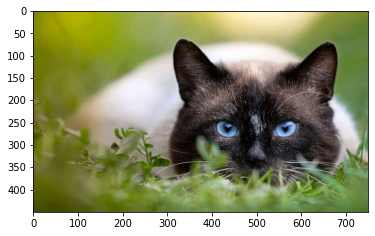

In [ ]:
def paraImagem(mascaras, numeroAmostras):
    matrizesCores = []
    for i in mascaras:
        medias = mediasColunas(i)
        matrizAux = subtrairMatrizes(i, medias)
        MC = matrizCovariancia(matrizAux)
        autovalor, autovetor = RetornaVetorEValor(MC)
        autovalor = autovalor[0:numeroAmostras]
        autovetor = autovetor[:, 0:numeroAmostras]
        autovetorT = matrizTransposta(autovetor)
        aux = multiplicaMatrizes(autovetorT, matrizAux)
        Final = multiplicaMatrizes(autovetor, aux)
        Final = somarMatrizes(Final, medias)
        matrizesCores.append(Final)
    return matrizesCores


mascaras = [azul, verde, vermelho]

mascaras = paraImagem(mascaras, numeroAmostras)

img_compressed = (np.dstack((mascaras[2], mascaras[1], mascaras[0]))).astype(np.uint8)
plt.imshow(img_compressed)

**Exemplo 2, com uma imagem em uma biblioteca de PCA (comparação)**

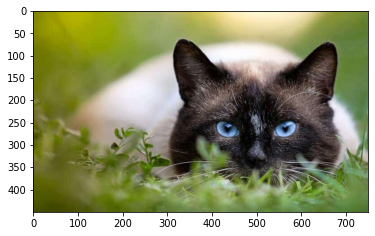

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(numeroAmostras)
red_transformed = pca.fit_transform(vermelho)
red_inverted = pca.inverse_transform(red_transformed)
green_transformed = pca.fit_transform(verde)
green_inverted = pca.inverse_transform(green_transformed)
blue_transformed = pca.fit_transform(azul)
blue_inverted = pca.inverse_transform(blue_transformed)
img_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)
plt.imshow(img_compressed)